In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [4]:
# Modified National Institute of Standards and Technology
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [8]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6553 - accuracy: 0.8350 - val_loss: 0.3596 - val_accuracy: 0.8999
Epoch 2/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3411 - accuracy: 0.9044 - val_loss: 0.2980 - val_accuracy: 0.9149
Epoch 3/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2931 - accuracy: 0.9165 - val_loss: 0.2676 - val_accuracy: 0.9241
Epoch 4/11
1875/1875 [==============================] - 2s 975us/step - loss: 0.2633 - accuracy: 0.9253 - val_loss: 0.2425 - val_accuracy: 0.9312
Epoch 5/11
1875/1875 [==============================] - 2s 944us/step - loss: 0.2399 - accuracy: 0.9329 - val_loss: 0.2244 - val_accuracy: 0.9354
Epoch 6/11
1875/1875 [==============================] - 2s 963us/step - loss: 0.2208 - accuracy: 0.9373 - val_loss: 0.2097 - val_accuracy: 0.9397
Epoch 7/11
1875/1875 [==============================] - 2s 944us/step - loss: 0.2047 - accuracy: 0.9427 - val_loss: 0.1965 - val_a

In [9]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 780us/step - loss: 0.1588 - accuracy: 0.9556
Loss=0.159
Accuracy=0.956


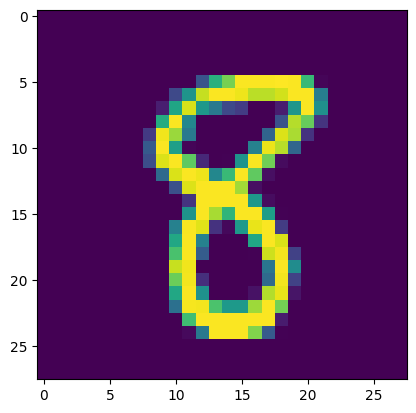

313/313 [==============================] - 0s 647us/step


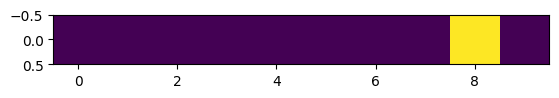

In [10]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow([predicted_value[n]])
plt.show()

In [11]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [7.6937053e-05 7.9895399e-06 3.5048148e-04 1.3157033e-03 2.1281448e-04
 1.7824848e-03 3.4640765e-05 1.7713351e-07 9.9612206e-01 9.6671742e-05]


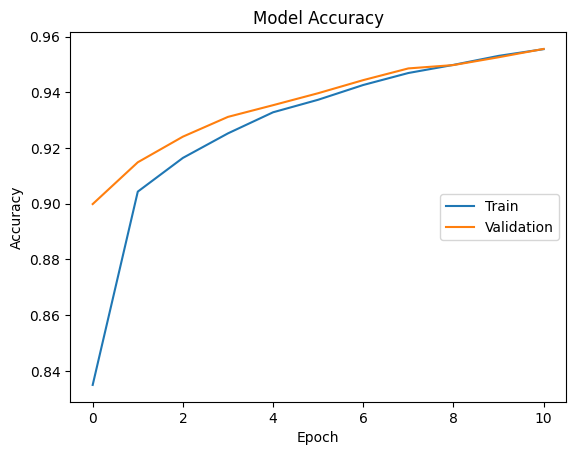

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

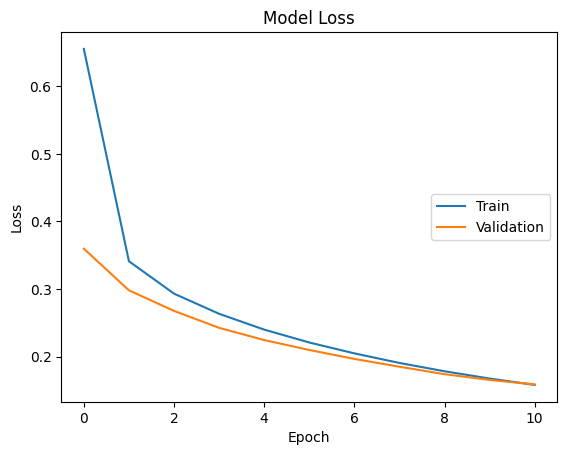

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()